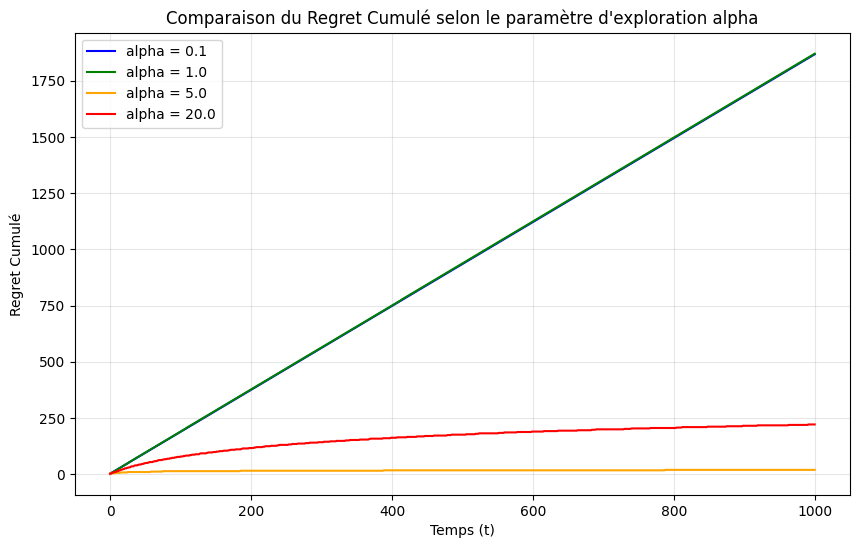

In [ ]:
# algo du bandit manchot 


import numpy as np
import matplotlib.pyplot as plt

# ON SIMMULE L"ARRIVÉ D"UN NOUVEL UTILISATEUR EN CRÉEANT UN PROFIL CACHÉ QU'ON VA PETIT A PETIT FAIRE DÉCOUVRIR À L'ALGO.

k = 3              # Nb de facteurs latents. 
nb_films = 10     
T = 1000           # nombre d'étape,


#Ici Q sera la matrice Q issue de la descente de gradient.

Q = np.random.rand(nb_films, k) 

# On crée un "Utilisateur Cible" caché (ce que l'algorithme doit deviner)
# Disons qu'il adore le facteur 1, déteste le 2 et est neutre sur le 3
theta_reel = np.array([5.0, 2.0, 0.0])

def simulation_note_donnée(film):
    q = Q[film]
    epsilon = np.random.normal(0, 0.1) 
    note = np.dot(q, theta_reel) + epsilon
    return note

# algo :

def linUCB(alpha):

    #matrice de départ A 
    A = np.identity(k)

    # Vecteur b de départ
    b = np.zeros(k)

    historique_regret = []
    regret_cumulé = 0   #on veut tracer la courbe d'évolution du regret et idéalement qu'elle s'applatisse au cours du temps

    #boucle :

    for t in range(1, T + 1):  #en réalité y a pas de boucle for mais juste une fonction update qui update A et b quand l'utilisateur donne une nouvelle note.
        scores_ucb = []
        
        A_inv = np.linalg.inv(A) # Calcul de l'inverse 
        theta_chapeau = np.dot(A_inv, b) # Estimation du profil 
        
        for i in range(nb_films):
            x = Q[i] # Contexte du film actuel
            
            # Formule du score p_ta (Ligne 9 image 2)
            exploitation = np.dot(theta_chapeau, x)
            exploration = alpha * np.sqrt(np.dot(x.T, np.dot(A_inv, x)))
            
            p = exploitation + exploration
            scores_ucb.append(p)
        
        # Choix du film avec le meilleur score 
        film_choisi = np.argmax(scores_ucb)
        
        note_recue = simulation_note_donnée(film_choisi)
        
        # Maj de A et b (A = A + x * x_transpose)
        A = A + np.outer(Q[film_choisi], Q[film_choisi])

        b = b + note_recue * Q[film_choisi]
        
        # calcul du regret

        notes_possibles = [np.dot(Q[j], theta_reel) for j in range(nb_films)]
        meilleure_note = max(notes_possibles)
        regret_cumulé += (meilleure_note - np.dot(Q[film_choisi], theta_reel))
        historique_regret.append(regret_cumulé)

    return historique_regret



# --- AFFICHAGE COMPARATIF ---
valeurs_alpha = [0.1, 1.0, 5.0, 20.0]
couleurs = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))

for alpha, couleur in zip(valeurs_alpha, couleurs):
    regret = linUCB(alpha)
    plt.plot(regret, label=f"alpha = {alpha}", color=couleur)

plt.title("Comparaison du Regret Cumulé selon le paramètre d'exploration alpha")
plt.xlabel("Temps (t)")
plt.ylabel("Regret Cumulé")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


